# Project 001 UCSD Data Science Visualization Bootcamp
## Plots and Gralphics Workbook
* Noreen Malik 😃
* Rene Venema("dutch") 🐱
* John Warlop 🦁
* Alex Wooten 🏄
😛😳😗😓🙉😸🙈🙊😽💀💢💥✨💏👫👄👃👀👛👛🗼🔮🔮🎄🎅👻

<span style="color:red">NOTE: EACH SECTION CAN BE RUN INDEPENDTLY.  THIS WAY YOU CAN TEST YOUR OWN CODE, NO DEPENDENCIES BEYOND PICKLE FILE YOU READ IN AT TOP OF YOUR SECTION. PICKLE FILE COMES FROM THE MAIN NOTEBOOK FILE.</span>.
<span style="color:red">

# John's Plots

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
AGI_PICKLE           = 'df_agi.pkl' #Cleaned up df after merging medicare and irs data
IRS_DATAFRAME_PICKLE = 'df_irs.pkl' #Raw file from IRS Tax Year 2015
main_df = pd.read_csv("main data cleaned.csv")
df_agi = pd.read_pickle(AGI_PICKLE)
df_agi.head(2)

In [ ]:
plt.figure(figsize=(16,6), dpi=80)
plt.scatter(df_agi['avgAGI'].tolist(),df_agi['oop'].tolist(),color="g",s=10)
plt.xlabel("Avg Gross Income($)")
plt.ylabel("Avg Out of Pocket Cost($)")
plt.show()
#ax = df.plot(kind='scatter', x='Avg Adj Gross Income', y='Out-Of-Pocket Costs')
aoop = sum(df_agi['oop'])/len(df_agi['oop'])
print(aoop)
# >>>>>>>>>>>>>>>>>>>>>>>>>>> END JOHN'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Alex's Plots

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
avg_cost_group = pd.read_pickle('avg_cost_group.pkl') #From main notebook

In [ ]:
# get the top 10 most expensive hospitals
plt.figure(1, figsize=(120,30))
x_axis = np.arange(0,10)
top_10_expensive = avg_cost_group["average_patient_payment"].sort_values(ascending=False).head(10)
tick_locations = [value for value in x_axis]
# print(list(top_10_expensive.reset_index()["provider_name"]))
plt.xticks(tick_locations, list(top_10_expensive.reset_index()["provider_name"]), size=35, rotation=45)
plt.yticks(size=60)

plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Providers Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive)

In [ ]:
top_10_expensive_zip = avg_cost_group["average_patient_payment"].sort_values(ascending=False).head(10)

plt.figure(2, figsize=(120,30))
x_axis = np.arange(0,10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(top_10_expensive_zip.reset_index()["provider_zip_code"]), size=70)
plt.yticks(size=60)
plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Providers' Zip Code Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive)

In [ ]:
avg_cost_group2=pd.read_pickle('avg_cost_group2.pkl') #Added jwarlop 4/16/18 
top_10_expensive_zip_avg = avg_cost_group2["average_patient_payment"].sort_values(ascending=False).head(10)

plt.figure(3, figsize=(120,30))
x_axis = np.arange(0,10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(top_10_expensive_zip_avg.reset_index()["provider_zip_code"]), size=70)
plt.yticks(size=60)
plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Zip Codes Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive_zip_avg)
# >>>>>>>>>>>>>>>>>>>>>>>>>>> END ALEX'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Dutch's Plots

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from scipy.stats import linregress

main_df = pd.read_csv("main data cleaned.csv")
state_totals_df = pd.read_pickle('state_totals_df.pkl')

In [2]:
scl = [[0.0, "rgb(242,240,247)"],[0.2, "rgb(218,218,235)"],[0.4, "rgb(188,189,220)"],
            [0.6, "rgb(158,154,200)"],[0.8, "rgb(117,107,177)"],[1.0, "rgb(84,39,143)"]]

In [3]:
state_totals_df["text"] = "Providers/state: " + state_totals_df["Total providers"] + "<br>" +\
    "ACC "+state_totals_df["ACC Total"]+"<br>"+"AMP "+state_totals_df["AMP Total"]+"<br>"+\
    "ATP "+state_totals_df["ATP Total"]

In [4]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_totals_df["State"],
        z = state_totals_df["Deficit"].astype(float),
        locationmode = 'USA-states',
        text = state_totals_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(40,40,40)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2015 US Medicare inpatient charges and payments by state<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

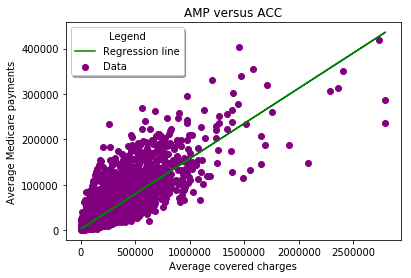

In [5]:
"""
Average Covered Charges plotted against Average Medicare Payments.
ACC and AMP are compared and a regression line is created.
Regression tell whether above data is correlated ("is there a linear relationship between the data)
"""

corr_df = main_df[["average_covered_charges","average_medicare_payments"]]

x_vals = corr_df["average_covered_charges"]
y_vals = corr_df["average_medicare_payments"]

# Grab linear regression data
slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

# Plot data
fig, ax = plt.subplots()

plt.scatter(x_vals, y_vals, color = "purple", label="Data")

ax.set_xlabel("Average covered charges")
ax.set_ylabel("Average Medicare payments")
ax.set_title("AMP versus ACC")

# Plot regression line
plt.plot(x_vals, intercept + slope*x_vals, color = "green", label="Regression line")

# Set plot size
plt.rcParams["figure.figsize"] = [12,9]

# Define legend
plt.legend(loc="best", ncol=1, shadow=True, title="Legend", fancybox=True)

plt.show()


# >>>>>>>>>>>>>>>>>>>>>>>>>>> END DUTCH'S  SECTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<